# Inbalanced Classes
## In this lab, we are going to explore a case of imbalanced classes. 


Like we disussed in class, when we have noisy data, if we are not careful, we can end up fitting our model to the noise in the data and not the 'signal'-- the factors that actually determine the outcome. This is called overfitting, and results in good results in training, and in bad results when the model is applied to real data. Similarly, we could have a model that is too simplistic to accurately model the signal. This produces a model that doesnt work well (ever). 


### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.

### First, download the data from: https://www.kaggle.com/ntnu-testimon/paysim1. Import the dataset and provide some discriptive statistics and plots. What do you think will be the important features in determining the outcome?
### Note: don't use the entire dataset, use a sample instead, with n=100000 elements, so your computer doesn't freeze.

In [62]:
import pandas as pd
import numpy as np

In [63]:
# Your code here
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [64]:
df=df.sample(n=10000, random_state=1)

In [65]:
# Your response here
df.shape

(10000, 11)

### What is the distribution of the outcome? 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002195B6D60C8>]],
      dtype=object)

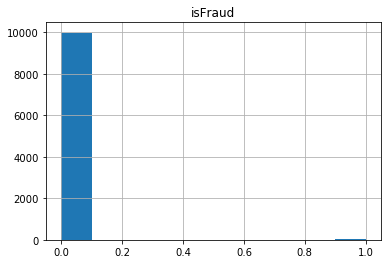

In [66]:
df.hist('isFraud')

In [67]:
df['isFraud'].value_counts()

0    9982
1      18
Name: isFraud, dtype: int64

In [68]:
df['step'].value_counts()

18     88
379    81
20     78
187    77
139    77
       ..
313     1
694     1
670     1
470     1
431     1
Name: step, Length: 372, dtype: int64

In [69]:
df['type'].value_counts()

CASH_OUT    3636
PAYMENT     3290
CASH_IN     2166
TRANSFER     846
DEBIT         62
Name: type, dtype: int64

In [70]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [71]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6322570,688,CASH_IN,23557.12,C867750533,8059.00,31616.12,C1026934669,169508.66,145951.53,0,0
3621196,274,PAYMENT,6236.13,C601099070,0.00,0.00,M701283411,0.00,0.00,0,0
1226256,133,PAYMENT,33981.87,C279540931,18745.72,0.00,M577905776,0.00,0.00,0,0
2803274,225,CASH_OUT,263006.42,C11675531,20072.00,0.00,C529577791,390253.56,653259.98,0,0
3201247,249,CASH_OUT,152013.74,C530649214,20765.00,0.00,C1304175579,252719.19,404732.93,0,0


### Clean the dataset. How are you going to integrate the time variable? Do you think the step (integer) coding in which it is given is appropriate?

In [72]:
# Your code here
df.drop(['step','nameOrig', 'nameDest', 'isFlaggedFraud'],axis=1,inplace=True)
df = pd.get_dummies(df)

In [73]:
df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
6322570,23557.12,8059.00,31616.12,169508.66,145951.53,0,1,0,0,0,0
3621196,6236.13,0.00,0.00,0.00,0.00,0,0,0,0,1,0
1226256,33981.87,18745.72,0.00,0.00,0.00,0,0,0,0,1,0
2803274,263006.42,20072.00,0.00,390253.56,653259.98,0,0,1,0,0,0
3201247,152013.74,20765.00,0.00,252719.19,404732.93,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2948862,55471.43,170934.16,115462.73,0.00,0.00,0,0,0,0,1,0
2478393,275323.79,0.00,0.00,22418556.09,22693879.88,0,0,1,0,0,0
4305032,709026.19,0.00,0.00,1601639.94,2310666.13,0,0,0,0,0,1
873865,4997.52,0.00,0.00,0.00,0.00,0,0,0,0,1,0


In [74]:
df.columns

Index(['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'type_CASH_IN', 'type_CASH_OUT',
       'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')

In [75]:
df.shape

(10000, 11)

### Run a logisitc regression classifier and evaluate its accuracy.

In [79]:
# Your code here
from sklearn.model_selection import train_test_split

X=df.drop('isFraud',axis=1)
y=df['isFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, accuracy_score

lr = LogisticRegression()
model=lr.fit(X_train, y_train)
model.score(X_test,y_test) 

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
acc = accuracy_score(y_test, y_pred)
pr = precision_score(y_test, y_pred)
rc = recall_score(y_test, y_pred)
print(cm)
print('accuracy:', acc, 'precision:', pr, 'recall:', rc)

[[1996    0]
 [   0    4]]
accuracy: 1.0 precision: 1.0 recall: 1.0


C:\Users\TDias\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### Now pick a model of your choice and evaluate its accuracy.

In [85]:
# Your code here

from sklearn.ensemble import GradientBoostingClassifier

gboost = GradientBoostingClassifier()
gboost.fit(X_train, y_train)

y_pred = gboost.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
ac = accuracy_score(y_test, y_pred)
p = precision_score(y_test, y_pred)
r = recall_score(y_test, y_pred)
print (cm)
print('accuracy:', ac, 'precision:', p, 'recall:', r)

[[1995    1]
 [   0    4]]
accuracy: 0.9995 precision: 0.8 recall: 1.0


### Which model worked better and how do you know?

### Your response here

Both models presented high accuracy, precision and recall. However, the great results obtained on the performances were due to the ammount of frauds that exist on the dataset. The Logistic Regression has a better precision than the GBC (determined a false negative). Considering the results, the Logistic Regression worked better.

### Note: before doing the first commit, make sure you don't include the large csv file, either by adding it to .gitignore, or by deleting it.